# 7/16

In [1]:
# 중복
import pandas as pd
import numpy as np
arr = np.array([1,2,1,2,2,3,3,3])
data = arr.reshape(4,2)
df = pd.DataFrame(data, columns=['a','b'])
df

,a,b
0,1,2
1,1,2
2,2,3
3,3,3


In [2]:
df1 = df.copy()
df1.drop_duplicates() # 1,2 두개 있으므로 뒤에 나오는 중복된 행 지워짐.

,a,b
0,1,2
2,2,3
3,3,3


In [3]:
df2 = df.copy()
df2.drop_duplicates(subset='b') # 컬럼을 정해주면 특정컬럼 안에 뒤에 나오는 중복되는 행 지워줌.

,a,b
0,1,2
2,2,3


In [4]:
df3 = df.copy()
df3.drop_duplicates(subset='b',keep='last') # keep : 남길 행 선택

,a,b
1,1,2
3,3,3


In [5]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [7]:
# 특정 컬럼의 값을 변경
titanic['sex'] = titanic.sex.replace({'male':0,'female':1})
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
# 열 이름 변경 : 'sex':'gender', 'age':'age_cat', 'class':'c_level'
titanic.rename(columns = {'sex':'gender',"age":"age_cat","class":"c_level"},inplace=True)
titanic

,survived,pclass,gender,age_cat,sibsp,parch,fare,embarked,c_level,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
# 컬럼명 대문자로

titanic.rename(columns=str.upper,inplace=True)
titanic

# 다른 방법
titanic.columns = map(lambda x : str(x).upper(),titanic.columns)

# 다른 방법(소문자로)
titanic.rename(str.lower, axis='columns',inplace=True)
titanic

,survived,pclass,gender,age_cat,sibsp,parch,fare,embarked,c_level,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
# 컬럼 선택 : 'survived','pclass','gender','class'

titanic = titanic[['survived','pclass','gender','c_level']]

In [12]:
# 컬럼 순서 변경 : 'pclass', 'gender','class','survived'

new_order = ['pclass','gender','c_level','survived']
df = titanic[new_order]
df.head()

,pclass,gender,c_level,survived
0,3,0,Third,0
1,1,1,First,1
2,3,1,Third,1
3,1,1,First,1
4,3,0,Third,0


In [13]:
import warnings
warnings.filterwarnings('ignore')

df['gender'].replace({0:'male',1:'female'},inplace=True)
df.head()

,pclass,gender,c_level,survived
0,3,male,Third,0
1,1,female,First,1
2,3,female,Third,1
3,1,female,First,1
4,3,male,Third,0


In [14]:
# 인코딩 - LabelEncoder
from sklearn.preprocessing import LabelEncoder # 싸이킷런

le = LabelEncoder()
features = ['gender','c_level']
for feature in features:
    df[feature] = le.fit_transform(df[feature]) # fit_transform() : fit은 인코딩할 준비, transform은 실행! (나눠서 쓰기도 함)

df.head() # 인코딩 됨

,pclass,gender,c_level,survived
0,3,1,2,0
1,1,0,0,1
2,3,0,2,1
3,1,0,0,1
4,3,1,2,0


In [15]:
df.gender.value_counts()

1    577
0    314
Name: gender, dtype: int64

In [16]:
df.c_level.value_counts()


2    491
0    216
1    184
Name: c_level, dtype: int64

In [17]:
df = titanic[['gender','c_level']]
df1 = df.copy()
df1.head()

,gender,c_level
0,0,Third
1,1,First
2,1,Third
3,1,First
4,0,Third


In [18]:
# 인코딩 - OneHotEncoder
pd.get_dummies(df1).head()

# 해당되는게 맞으면 1, 틀리면 0

,gender,c_level_First,c_level_Second,c_level_Third
0,0,0,0,1
1,1,1,0,0
2,1,0,0,1
3,1,1,0,0
4,0,0,0,1


In [20]:
# 싸이킷런에서 제공하는 교육용 데이터
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys(), type(boston))
print()
boston.target
# print(boston.DESCR) # print() 사용해서 출력하면 정리되서 나옴!!
print(boston.feature_names)
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = boston.target
df_boston.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename']) <class 'sklearn.utils.Bunch'>

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

data : 데이터셋의 정보가 numpy.ndarray 형태로 저장  
target : 레이블 정보  
feature_names : 데이터셋의 컬럼정보  
DESCR : 데이터셋 설명  
filename : 해당 데이터셋의 저장 위치 정보 표시

In [22]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [23]:
# 스케일링 - 정규화
# 숫자의 크기가 클 때 / 스케일링해서 비교
# MinMaxScaler : 0~1사이로 바뀜

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
df_boston['RM'] = scaler.fit_transform(df_boston[['RM']])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,0.577505,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,0.547998,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,0.694386,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,0.658555,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,0.687105,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
df_boston.RM.mean()

0.5218690146295801

In [25]:
# 스케일링 - 표준화(표준정규분포)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_boston['INDUS'] = scaler.fit_transform(df_boston[['INDUS']])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,-1.287909,0.0,0.538,0.577505,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,-0.593381,0.0,0.469,0.547998,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,-0.593381,0.0,0.469,0.694386,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,-1.306878,0.0,0.458,0.658555,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,-1.306878,0.0,0.458,0.687105,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
df_boston.INDUS.mean() # 평균 0
df_boston.INDUS.std() # 표준편차 1
### 가우시안표준정규분포

1.0009896093465716

<AxesSubplot:ylabel='Density'>

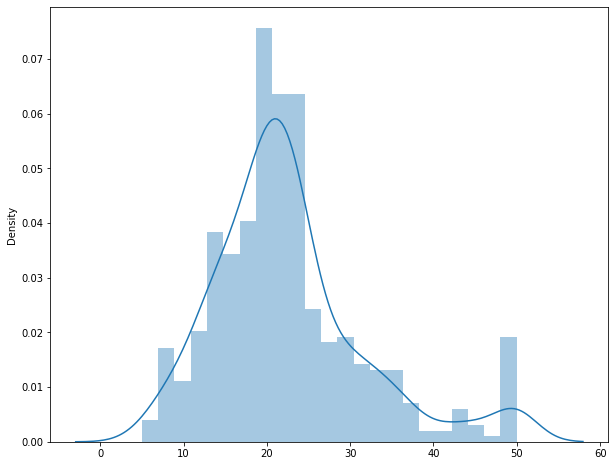

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.distplot(df_boston[['target']])

### 정규분포가 아님

<AxesSubplot:ylabel='Density'>

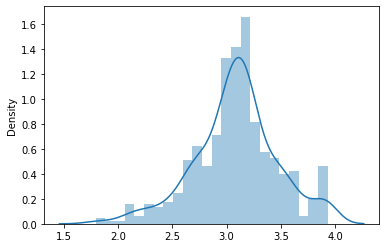

In [28]:
# 로그 변환 ### 정규분포에 가깝게 하기 위한 과정

import numpy as np
df_boston['target'] = np.log1p(df_boston[['target']]) ### 기존에 타겟에 있는 숫자들을 로그로 변환
sns.distplot(df_boston[['target']])

In [29]:
# 로그 변환 환원
df_boston['target'] = np.expm1(df_boston[['target']])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,-1.287909,0.0,0.538,0.577505,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,-0.593381,0.0,0.469,0.547998,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,-0.593381,0.0,0.469,0.694386,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,-1.306878,0.0,0.458,0.658555,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,-1.306878,0.0,0.458,0.687105,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
